In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv("traindata - traindata.csv")
train

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,7192191720,1,FROZEN FOODS,9117
1,7,20,Friday,68113106754,2,SERVICE DELI,4010
2,25,28,Friday,880552000000,1,LADIESWEAR,313
3,25,28,Friday,80859474194,1,LADIESWEAR,4447
4,25,28,Friday,4900003661,1,DSD GROCERY,9538
...,...,...,...,...,...,...,...
77181,25,191343,Sunday,88530627785,2,MENS WEAR,5701
77182,25,191343,Sunday,4900000977,2,DSD GROCERY,9211
77183,25,191343,Sunday,3400000246,1,IMPULSE MERCHANDISE,100
77184,25,191343,Sunday,88882358092,1,MENS WEAR,2828


In [235]:
test = pd.read_csv("testdata.csv")
test

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063
1,361,Friday,6.727878e+10,1,MENS WEAR,1605
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744
...,...,...,...,...,...,...
2995,191158,Sunday,5.010046e+09,5,FROZEN FOODS,4138
2996,191164,Sunday,7.874235e+09,1,DAIRY,1508
2997,191225,Sunday,7.047049e+09,1,DAIRY,1344
2998,191256,Sunday,4.393559e+09,1,MENS WEAR,5542


In [9]:
train.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,7,20,Friday,7192191720,1,FROZEN FOODS,9117
1,7,20,Friday,68113106754,2,SERVICE DELI,4010
2,25,28,Friday,880552000000,1,LADIESWEAR,313
3,25,28,Friday,80859474194,1,LADIESWEAR,4447
4,25,28,Friday,4900003661,1,DSD GROCERY,9538


In [11]:
train.tail()


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
77181,25,191343,Sunday,88530627785,2,MENS WEAR,5701
77182,25,191343,Sunday,4900000977,2,DSD GROCERY,9211
77183,25,191343,Sunday,3400000246,1,IMPULSE MERCHANDISE,100
77184,25,191343,Sunday,88882358092,1,MENS WEAR,2828
77185,25,191343,Sunday,88743952722,1,MENS WEAR,5225


In [15]:
train.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [17]:
train.shape

(77186, 7)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77186 entries, 0 to 77185
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TripType               77186 non-null  int64 
 1   VisitNumber            77186 non-null  int64 
 2   Weekday                77186 non-null  object
 3   Upc                    77186 non-null  int64 
 4   ScanCount              77186 non-null  int64 
 5   DepartmentDescription  77186 non-null  object
 6   FinelineNumber         77186 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 4.1+ MB


In [23]:
train.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,77186.000000,77186.000000,7.718600e+04,77186.000000,77186.000000
mean,24.634662,97598.612171,4.819450e+10,1.132822,3916.058314
std,12.465073,55644.720953,1.420542e+11,0.637600,2768.961284
min,7.000000,20.000000,3.035000e+03,-4.000000,0.000000
25%,7.000000,49695.000000,3.700089e+09,1.000000,1508.000000
50%,25.000000,98708.000000,7.453490e+09,1.000000,3559.000000
75%,38.000000,146742.000000,6.053887e+10,1.000000,6012.000000
max,38.000000,191343.000000,9.781630e+11,46.000000,9998.000000


In [25]:
train.describe(include = 'object')

,Weekday,DepartmentDescription
count,77186,77186
unique,7,64
top,Sunday,GROCERY DRY GOODS
freq,15343,10040


In [27]:
train['TripType'].nunique()

3

In [31]:
train['TripType'].unique()

array([ 7, 25, 38])

In [33]:
train['TripType'].value_counts()

TripType
38    28525
25    26493
7     22168
Name: count, dtype: int64

In [35]:
#Trip type 38 is the most dominating one 

Text(0, 0.5, 'Frequency')

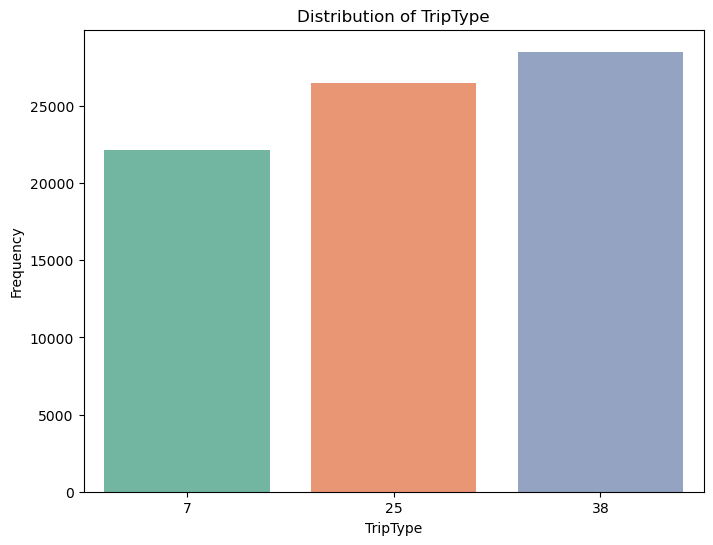

In [37]:
plt.figure(figsize = (8,6))
sns.countplot(data= train, x= 'TripType', palette = "Set2")
plt.title('Distribution of TripType')
plt.xlabel('TripType')
plt.ylabel('Frequency')

In [39]:
#total quatities bought for each trip type 

In [63]:
gs = train.groupby("TripType")["ScanCount"].sum()
gs

TripType
7     25854
25    28049
38    33535
Name: ScanCount, dtype: int64

In [65]:
gs.index = gs.index.astype('str')

In [67]:
gs.values

array([25854, 28049, 33535])

Text(0, 0.5, 'Scan Counts')

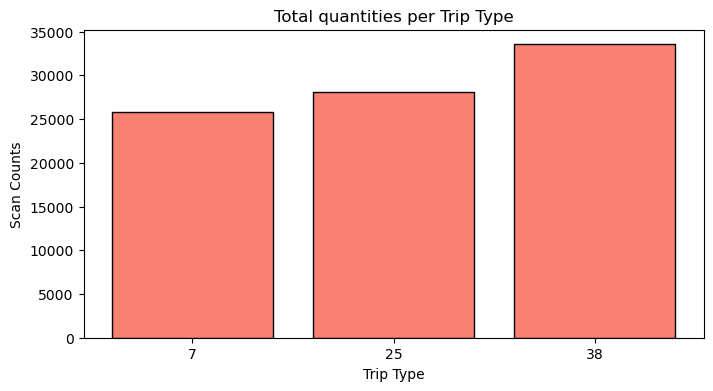

In [73]:
plt.figure(figsize=(8,4))
plt.bar(gs.index,gs.values,color="salmon", edgecolor = 'black')
plt.title("Total quantities per Trip Type")
plt.xlabel("Trip Type")
plt.ylabel("Scan Counts")

In [75]:
#Trip 38 is the one where shoppers are buying in more quatities 

In [77]:
train['DepartmentDescription'].value_counts(ascending = False)

DepartmentDescription
GROCERY DRY GOODS       10040
DAIRY                    8596
DSD GROCERY              7156
PRODUCE                  5593
MENS WEAR                5285
                        ...  
OTHER DEPARTMENTS           4
FURNITURE                   4
SEASONAL                    2
CAMERAS AND SUPPLIES        2
PHARMACY RX                 1
Name: count, Length: 64, dtype: int64

In [79]:
train.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [85]:
c = train.groupby(['VisitNumber', 'TripType'])['ScanCount'].sum().reset_index()
c.head()

,VisitNumber,TripType,ScanCount
0,20,7,3
1,28,25,8
2,43,38,4
3,72,7,3
4,76,7,4


In [87]:
c.shape

(12309, 3)

In [91]:
c_r = c.sort_values(by= 'ScanCount', ascending = False )
c_r

,VisitNumber,TripType,ScanCount
5299,84350,38,89
8040,127057,38,81
4430,71143,38,74
12135,188905,38,68
1725,27356,38,66
...,...,...,...
8876,140036,38,0
7326,116544,7,0
8660,136530,38,-1
4686,75132,7,-1


In [97]:
c_r_top15 = c_r.head(15)

Text(0.5, 1.0, 'Trip type vs Basket Size')

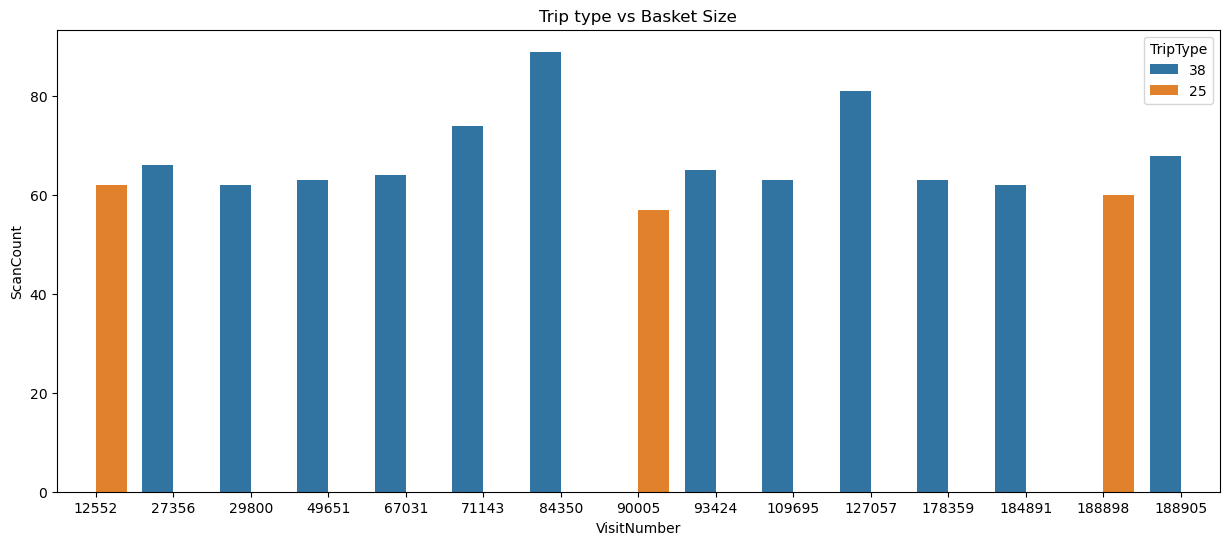

In [107]:
plt.figure(figsize = (15,6))
sns.barplot(data = c_r_top15, x = 'VisitNumber', y = 'ScanCount', hue = 'TripType',errorbar=None)
plt.title("Trip type vs Basket Size")

In [ ]:
#trip 38 is the one with more basket size followed by trip 25

In [113]:
w = train.groupby (['TripType', 'Weekday']).size().reset_index(name = 'Count')
w

,TripType,Weekday,Count
0,7,Friday,3078
1,7,Monday,3127
2,7,Saturday,3451
3,7,Sunday,3840
4,7,Thursday,2739
5,7,Tuesday,2825
6,7,Wednesday,3108
7,25,Friday,4231
8,25,Monday,2811
9,25,Saturday,5369


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

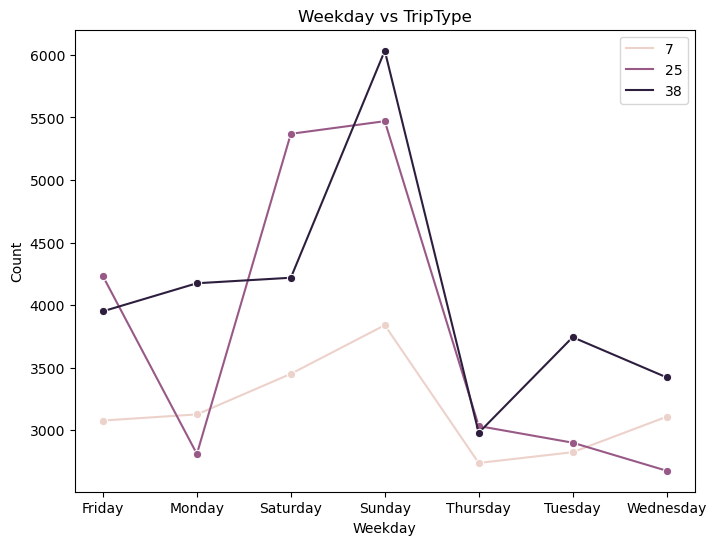

In [125]:
plt.figure(figsize= (8, 6))
sns.lineplot(data= w, x = 'Weekday', y = 'Count', hue = 'TripType', marker = 'o' )
plt.title('Weekday vs TripType')
plt.legend(loc = 'upper right')
plt.xlabel('Weekday')
plt.ylabel('Count')

In [127]:
#Trip 7, 25, 38 has the highest occurence on Sunday
#Trip 38 - bulk shoppers tend to buy more from sunday to Tuesday
#Thursday seems to  occupy least sales among all the trip types 
#trip 25 Medium level shoppers who tends to buy more on Saturdays

In [131]:
train.columns

Index(['TripType', 'VisitNumber', 'Weekday', 'Upc', 'ScanCount',
       'DepartmentDescription', 'FinelineNumber'],
      dtype='object')

In [135]:
t = train.drop(['VisitNumber', 'Upc', 'FinelineNumber'], axis = 1) 
t

,TripType,Weekday,ScanCount,DepartmentDescription
0,7,Friday,1,FROZEN FOODS
1,7,Friday,2,SERVICE DELI
2,25,Friday,1,LADIESWEAR
3,25,Friday,1,LADIESWEAR
4,25,Friday,1,DSD GROCERY
...,...,...,...,...
77181,25,Sunday,2,MENS WEAR
77182,25,Sunday,2,DSD GROCERY
77183,25,Sunday,1,IMPULSE MERCHANDISE
77184,25,Sunday,1,MENS WEAR


In [141]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

t['Weekday_Encoded']= label_encoder.fit_transform(t['Weekday'])
t['DepartmentDescription_Encoded']= label_encoder.fit_transform(t['DepartmentDescription'])

In [143]:
t

,TripType,Weekday,ScanCount,DepartmentDescription,Weekday_Encoded,DepartmentDescription_Encoded
0,7,Friday,1,FROZEN FOODS,0,20
1,7,Friday,2,SERVICE DELI,0,56
2,25,Friday,1,LADIESWEAR,0,35
3,25,Friday,1,LADIESWEAR,0,35
4,25,Friday,1,DSD GROCERY,0,16
...,...,...,...,...,...,...
77181,25,Sunday,2,MENS WEAR,3,40
77182,25,Sunday,2,DSD GROCERY,3,16
77183,25,Sunday,1,IMPULSE MERCHANDISE,3,30
77184,25,Sunday,1,MENS WEAR,3,40


In [145]:
X = t.drop(['TripType', 'Weekday', 'DepartmentDescription'], axis = 1)
Y = t['TripType']

In [147]:
X

,ScanCount,Weekday_Encoded,DepartmentDescription_Encoded
0,1,0,20
1,2,0,56
2,1,0,35
3,1,0,35
4,1,0,16
...,...,...,...
77181,2,3,40
77182,2,3,16
77183,1,3,30
77184,1,3,40


In [149]:
Y

0         7
1         7
2        25
3        25
4        25
         ..
77181    25
77182    25
77183    25
77184    25
77185    25
Name: TripType, Length: 77186, dtype: int64

In [153]:
from sklearn.model_selection import train_test_split 
x_train, x_test,y_train, y_test =  train_test_split (X, Y, test_size = 0.2, random_state = 13)

In [155]:
x_train

,ScanCount,Weekday_Encoded,DepartmentDescription_Encoded
34506,1,0,35
16714,1,4,15
26675,1,1,20
72061,1,2,24
28426,1,5,16
...,...,...,...
36794,1,2,56
25324,1,1,16
65689,1,6,30
33634,2,4,30


In [157]:
y_test

75823    38
41405     7
44671    25
48972    25
61344     7
         ..
7048     25
66509     7
50326     7
42409    38
43507     7
Name: TripType, Length: 15438, dtype: int64

In [159]:
from sklearn.ensemble import RandomForestClassifier 

In [185]:
model = RandomForestClassifier  (n_estimators = 100, random_state = 13)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=13)

In [186]:
#evaluate the model 

In [187]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(x_test)

In [191]:
accuracy_score(y_test,y_pred)

0.6991190568726519

In [193]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           7       0.65      0.54      0.59      4502\n          25       0.84      0.80      0.82      5322\n          38       0.62      0.72      0.67      5614\n\n    accuracy                           0.70     15438\n   macro avg       0.70      0.69      0.69     15438\nweighted avg       0.70      0.70      0.70     15438\n'

In [255]:
test

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Weekday_Encoded,DepartmentDescription_Encoded
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063,0,18
1,361,Friday,6.727878e+10,1,MENS WEAR,1605,0,37
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551,0,14
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135,0,27
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744,0,45
...,...,...,...,...,...,...,...,...
2995,191158,Sunday,5.010046e+09,5,FROZEN FOODS,4138,3,18
2996,191164,Sunday,7.874235e+09,1,DAIRY,1508,3,13
2997,191225,Sunday,7.047049e+09,1,DAIRY,1344,3,13
2998,191256,Sunday,4.393559e+09,1,MENS WEAR,5542,3,37


In [222]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

test['Weekday_Encoded']= label_encoder.fit_transform(test['Weekday'])
test['DepartmentDescription_Encoded']= label_encoder.fit_transform(test['DepartmentDescription'])

In [257]:
test

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Weekday_Encoded,DepartmentDescription_Encoded
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063,0,18
1,361,Friday,6.727878e+10,1,MENS WEAR,1605,0,37
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551,0,14
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135,0,27
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744,0,45
...,...,...,...,...,...,...,...,...
2995,191158,Sunday,5.010046e+09,5,FROZEN FOODS,4138,3,18
2996,191164,Sunday,7.874235e+09,1,DAIRY,1508,3,13
2997,191225,Sunday,7.047049e+09,1,DAIRY,1344,3,13
2998,191256,Sunday,4.393559e+09,1,MENS WEAR,5542,3,37


In [245]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

test['Weekday_Encoded']= label_encoder.fit_transform(test['Weekday'])
test['DepartmentDescription_Encoded']= label_encoder.fit_transform(test['DepartmentDescription'])
test

,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Weekday_Encoded,DepartmentDescription_Encoded
0,87,Friday,7.106841e+09,1,FROZEN FOODS,4063,0,18
1,361,Friday,6.727878e+10,1,MENS WEAR,1605,0,37
2,385,Friday,2.840007e+09,1,DSD GROCERY,4551,0,14
3,413,Friday,2.200000e+09,1,IMPULSE MERCHANDISE,135,0,27
4,462,Friday,7.282133e+10,1,PLUS AND MATERNITY,744,0,45
...,...,...,...,...,...,...,...,...
2995,191158,Sunday,5.010046e+09,5,FROZEN FOODS,4138,3,18
2996,191164,Sunday,7.874235e+09,1,DAIRY,1508,3,13
2997,191225,Sunday,7.047049e+09,1,DAIRY,1344,3,13
2998,191256,Sunday,4.393559e+09,1,MENS WEAR,5542,3,37


In [247]:
te = test.drop(['VisitNumber', 'Weekday','Upc','DepartmentDescription', 'FinelineNumber'], axis = 1) 
te

,ScanCount,Weekday_Encoded,DepartmentDescription_Encoded
0,1,0,18
1,1,0,37
2,1,0,14
3,1,0,27
4,1,0,45
...,...,...,...
2995,5,3,18
2996,1,3,13
2997,1,3,13
2998,1,3,37


In [253]:
test_pred = model.predict(te)
test_pred 

array([25, 25, 25, ..., 38, 25, 25])

In [263]:
submission = pd.DataFrame({'VisitNumber':test['VisitNumber'],'TripType':test_pred})
submission

,VisitNumber,TripType
0,87,25
1,361,25
2,385,25
3,413,25
4,462,25
...,...,...
2995,191158,38
2996,191164,38
2997,191225,38
2998,191256,25
